# Оглавление
1. [Описание поректа](#introduction)
2. [Открытие файлов с данными](#paragraph1)    
3. [Предобработка данных](#paragraph2)  
    3.1 [Проверка типов данных](#subparagraph1)  
    3.2 [Изучение пропусков в датафрейме](#subparagraph2)  
    3.3 [Изучение дубликатов в датафрейме](#subparagraph3)  
    3.4 [Изучение категориальных значений](#subparagraph4)  
    3.5 [Проверка количественных значений](#subparagraph5)  
    3.6 [Добавление новых столбцов](#subparagraph6)
4. [Исследовательский анализ данных](#paragraph3) 
5. [Общий вывод](#paragraph4) 

<a name="introduction"></a>

## Описание проекта <a name="introduction"></a>



**Исследование данных о российском кинопрокате**
Заказчик исследования данного исследования — Министерство культуры Российской Федерации. Данные опубликованы на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

**Описание данных:**

Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений:  
title — название фильма;  
puNumber — номер прокатного удостоверения;  
show_start_date — дата премьеры фильма;  
type — тип фильма;  
film_studio — студия-производитель;  
production_country — страна-производитель;  
director — режиссёр;  
producer — продюсер;  
age_restriction — возрастная категория;  
refundable_support — объём возвратных средств государственной поддержки;  
nonrefundable_support — объём невозвратных средств государственной поддержки;  
financing_source — источник государственного финансирования;  
budget — общий бюджет фильма;  
ratings — рейтинг фильма на КиноПоиске;  
genres — жанр фильма.  
Столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.  
Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.  
puNumber — номер прокатного удостоверения;  
box_office — сборы в рублях.  

<a name="paragraph1"></a>

## 1. Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.options.mode.chained_assignment = None 

Загрузим датасет `mkrf_movies`:

In [2]:
df_1 = pd.read_csv('/datasets/mkrf_movies.csv').copy()
df_1.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


Изучим общую информацию о датасете df_1

In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Загрузим датасет `mkrf_shows`:

In [4]:
df_2 = pd.read_csv('/datasets/mkrf_shows.csv').copy()
df_2.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [5]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Объединим два датафрейма. Предварительно:
 - приведем название столбца `puNumber` к змеиному регистру 
 - проверим столбец `puNumber` в df_1
 - изменим тип данных столбца `puNumber` в df_2

In [6]:
# Приведем к змеиному регистру:
df_1 = df_1.rename(columns={'puNumber': 'pu_number'})
df_1.columns

Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres'],
      dtype='object')

In [7]:
df_2 = df_2.rename(columns={'puNumber': 'pu_number'})
df_2.columns

Index(['pu_number', 'box_office'], dtype='object')

In [8]:
# Проверим данные в столбце:
df_1['pu_number'].sort_values().tail()

4355    226017410
3992    226019110
1011    231001012
5249    231001111
1797          нет
Name: pu_number, dtype: object

In [9]:
sorted(df_1['pu_number'].unique())

[' 111004112',
 '111000110',
 '111000111',
 '111000112',
 '111000113',
 '111000114',
 '111000115',
 '111000116',
 '111000117',
 '111000118',
 '111000119',
 '111000210',
 '111000211',
 '111000212',
 '111000213',
 '111000214',
 '111000215',
 '111000216',
 '111000217',
 '111000218',
 '111000219',
 '111000310',
 '111000311',
 '111000312',
 '111000313',
 '111000314',
 '111000315',
 '111000317',
 '111000318',
 '111000319',
 '111000410',
 '111000411',
 '111000412',
 '111000413',
 '111000414',
 '111000415',
 '111000416',
 '111000417',
 '111000418',
 '111000419',
 '111000510',
 '111000511',
 '111000512',
 '111000513',
 '111000514',
 '111000515',
 '111000516',
 '111000517',
 '111000518',
 '111000519',
 '111000610',
 '111000611',
 '111000612',
 '111000613',
 '111000614',
 '111000615',
 '111000616',
 '111000617',
 '111000618',
 '111000619',
 '111000710',
 '111000711',
 '111000712',
 '111000714',
 '111000715',
 '111000716',
 '111000717',
 '111000718',
 '111000719',
 '111000810',
 '111000811',
 '111

In [10]:
df_1['pu_number'] = df_1['pu_number'].replace(' 111004112', '111004112')

In [11]:
df_2['pu_number'] = df_2['pu_number'].astype(str)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pu_number   3158 non-null   object 
 1   box_office  3158 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


In [12]:
df = df_1.merge(df_2, how='left', on='pu_number')
df.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   pu_number              7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [14]:
df.describe()

,refundable_support,nonrefundable_support,budget,box_office
count,3.320000e+02,3.320000e+02,3.320000e+02,3.158000e+03
mean,1.186446e+07,4.898099e+07,1.272297e+08,7.647870e+07
std,2.491656e+07,5.998012e+07,1.885883e+08,2.403531e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.500000e+07,4.200000e+07,8.623900e+04
50%,0.000000e+00,3.000000e+07,6.864992e+07,2.327988e+06
75%,1.500000e+07,4.037500e+07,1.419853e+08,2.397967e+07
max,1.800000e+08,4.000000e+08,2.305074e+09,3.073569e+09


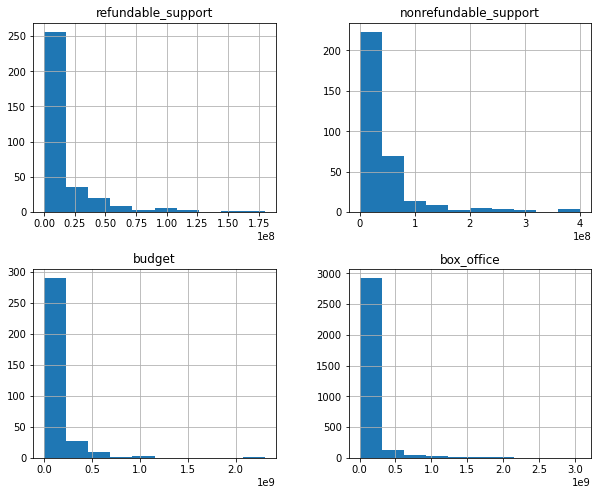

In [15]:
df.hist(figsize=(10,8))
plt.show()

**Вывод:**
   1. В данных присутствуют пропущенные значения. Количество не пустых ячеек не соответствует общему количеству строк;
   2. Есть выбросы значений;
   3. Несоответствие содержимого типу данных столстолбца: show_start_date, ratings

## 2. Предобработка данных

### 2.1 Проверка типов данных

Приведим тип данных столбца к типу данных

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   pu_number              7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**show_start_date**.  Переведем в формат datetime с точнстью до дня:

In [17]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%d')
df.dtypes['show_start_date']

datetime64[ns, UTC]

In [18]:
df.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


**ratings** необходимо провести предобработку

In [19]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [20]:
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')

In [21]:
df['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6, 4.2,
       5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 3.7, 1.4, 3.1, 3.5, 3.2, 2.8,
       1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 1. , 1.3, 1.9, 1.8, 1.2, 1.7,
       9. , 8.9, 9.1])

In [22]:
df['ratings'] = df['ratings'].astype('float32')
df.dtypes['ratings']

dtype('float32')

### 2.2 Изучение пропусков в датафрейме

Проверим пропущенные значения в колонках:

In [23]:
df.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
dtype: int64

**film_studio, producer, director, genres** отностится к категориальным данным, заменим пустые значения на unknown

In [24]:
df[['producer', 'director', 'film_studio', 'genres']] =\
        df[['producer', 'director', 'film_studio', 'genres']].fillna('unknown')
df[['producer', 'director', 'film_studio', 'genres']].isna().sum()

producer       0
director       0
film_studio    0
genres         0
dtype: int64

**production_country** проверим строки с пустыми значениями

In [25]:
df[df['production_country'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,unknown,NaN,unknown,unknown,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


Заменим пустые значения на страну производства: россия

In [26]:
df['production_country'] = df['production_country'].fillna('россия')
df['production_country'].isna().sum()

0

В колонках refundable_support, nonrefundable_support, budget, financing_source, ratings пропуски оставляем без изменений. Пропуски обусловленны характером исходных данных.

### 2.3 Изучение дубликатов в датафрейме
С точки зрения дубликатов наиболее интересны две колонки `pu_number` и `title`. В остальных колонках наличие дубликатов является нормой.

**pu_number**

In [27]:
df['pu_number'].duplicated().sum()

2

In [28]:
df['pu_number'] = df['pu_number'].drop_duplicates()

**title**. Допустимо, что разные фильмы могут иметь одиноковое название. Так же наличие дубликатов в этой колонке обусловленно тем, что на один и тот же фильм может быть выдано несколько прокатных удостоверений. За дубликаты в этой колонке будем принимать фильм с одинаковым названием, режиссром и сбором:

In [29]:
df['title'].duplicated().sum()

714

In [30]:
len(df['title'].unique())

6772

Проведем предобработку:

In [31]:
df['title'] = df['title'].str.replace(r'[^\w\s]+', '', regex=True)
df['title'] = df['title'].str.replace('_', '')
df['title'] = df['title'].str.replace('  ', ' ')
df['title'] = df['title'].str.lower()
df['title'] = df['title'].str.strip()

In [32]:
len(df['title'].unique())

6648

In [33]:
df['title'].unique()

array(['открытый простор', 'особо важное задание', 'особо опасен', ...,
       'щенячий патруль скорей спешим на помощь',
       'машины песенки серия испанские мотивы',
       'машины песенки серия когда цветут кактусы'], dtype=object)

In [34]:
df['title'].duplicated().sum()

838

In [35]:
df['title'].value_counts()

доброе утро                                                                    5
волшебная страна                                                               5
день святого валентина                                                         5
соблазнитель                                                                   4
король лев                                                                     4
                                                                              ..
жорж бизе кармен по произведению проспера мериме постановка театра ла скала    1
рубеж                                                                          1
коллекционер                                                                   1
одна встреча                                                                   1
идиоты и ангелы                                                                1
Name: title, Length: 6648, dtype: int64

In [36]:
df[df['title'] == 'доброе утро']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1965,доброе утро,111016514,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,А.Фролов,unknown,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.1,"драма,мелодрама,комедия",NaN
4680,доброе утро,121023510,2010-12-21 12:00:00+00:00,Художественный,Бэд Робот,США,Роджер Мичелл,"Джей Джей Абрамс, Брайан Берк",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.1,"драма,мелодрама,комедия",NaN
5153,доброе утро,221082111,2011-07-11 12:00:00+00:00,Художественный,Бэд Робот,США,Роджер Мичелл,"Джей Джей Абрамс, Брайан Берк",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.1,"драма,мелодрама,комедия",NaN
5188,доброе утро,221050911,2011-04-11 12:00:00+00:00,Художественный,Бэд Робот,США,Роджер Мичелл,"Джей Джей Абрамс, Брайан Берк",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.1,"драма,мелодрама,комедия",NaN
7121,доброе утро,121021519,2019-08-05 12:00:00+00:00,Художественный,Изюм Фильм Продакшн,Армения,Анна Аревшатян,"Шушаник Аревшатян, Валерий Саарян",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.1,"драма,мелодрама,комедия",NaN


In [37]:
df.shape

(7486, 16)

In [38]:
df = df.drop_duplicates(subset=['title', 'director', 'box_office'])

In [39]:
df['title'].value_counts()

хаббл 3d            4
прощание            4
волшебная страна    4
успех               3
кунгфу панда 2      3
                   ..
на опушке леса      1
патрик              1
эбигейл             1
манифесто           1
идиоты и ангелы     1
Name: title, Length: 6648, dtype: int64

In [40]:
df.shape

(6970, 16)

In [41]:
df[df['title'] == 'прощание']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
266,прощание,111029414,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Э.Климов,unknown,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.2,драма,NaN
5514,прощание,211037617,2017-09-07 12:00:00+00:00,Художественный,Всероссийский государственный институт кинемат...,Россия,А.Петровская,В.Найговзина,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.2,драма,NaN
6909,прощание,111007519,2019-05-01 12:00:00+00:00,Художественный,ИП Киселев Алексей Евгеньевич,Россия,М.Фомина,А.Киселев,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.2,драма,NaN
7281,прощание,121028719,2019-10-07 12:00:00+00:00,Художественный,"Биг Бич Филмз, Депз оф Филд, Киндред Спирит",США,Лулу Ванг,"Анита Го, Даниэль Тейт Мелиа, Эндрю Миано",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.2,драма,2617932.5


### 2.4 Изучение категориальных значений

**type**

In [42]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [43]:
df['type'] = df['type'].str.strip()

In [44]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

**film_studio**

In [45]:
len(df['title'].unique())

6648

In [46]:
df['film_studio'] = df['film_studio'].str.replace(r'[^\w\s]+', '', regex=True)
df['film_studio'] = df['film_studio'].str.lower()
df['film_studio'] = df['film_studio'].str.strip()

In [47]:
len(df['film_studio'].unique())

5389

In [48]:
df['film_studio'].unique()

array(['тачстоун пикчерз кобальт пикчерз бикон пикчерз тиг продакшнз',
       'киностудия мосфильм',
       'юниверсал пикчерз кикстарт продакшнз марк платт продакшнз рилейтивити медиа спайгласс интертейнмент стилкин филмз топ кау продакшнз',
       ..., 'севен артс продакшнз',
       'дэниел гродник продакшнз вандерфилм медиа корпорэйшн импринт интертейнмент вор хорс интертейнмент пимиента',
       'никелодеон анимейшн студиос спин мастер'], dtype=object)

**production_country**

In [49]:
len(df['production_country'].unique())

948

In [50]:
df['production_country'] = df['production_country'].str.replace(' - ', ' ')
df['production_country'] = df['production_country'].str.replace('-', ' ')
df['production_country'] = df['production_country'].str.replace('.', '', regex=True)
df['production_country'] = df['production_country'].str.lower()
df['production_country'] = df['production_country'].str.strip()

In [51]:
len(df['production_country'].unique())

859

In [52]:
df['production_country'].unique()

array(['сша', 'ссср', 'франция', 'ссср, венгрия',
       'германия великобритания', 'великобритания италия', 'чехословакия',
       'сша франция турция', 'новая зеландия', 'канада франция испания',
       'сша германия', 'сша великобритания', 'великобритания',
       'франция мексика сша', 'россия, казахстан, сша', 'ссср, швеция',
       'ссср, франция, англия, куба, гдр', 'германия',
       'великобритания сша германия кнр',
       'ссср, чсср, западный берлин, пнр', 'ссср, италия', 'гонконг, кнр',
       'сша франция', 'сша япония франция великобритания',
       'гонконг сингапур таиланд великобритания', 'сша канада',
       'франция италия великобритания сша', 'франция сша',
       'ирландия великобритания германия', 'чехия', 'сша австралия',
       'ссср, финляндия', 'сша франция великобритания австрия',
       'сша бельгия', 'сша ирландия великобритания', 'великобритания сша',
       'люксембург нидерланды испания великобритания сша италия',
       'великобритания франция сша', 'н

**director**

In [53]:
len(df['director'].unique())

4812

In [54]:
df['director'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

In [55]:
df['director'] = df['director'].str.lower()
df['director'] = df['director'].str.strip()

In [56]:
len(df['director'].unique())

4797

**producer**

In [57]:
len(df['producer'].unique())

5342

In [58]:
df['producer'] = df['producer'].str.replace(r'[^\w\s]+', '', regex=True)
df['producer'] = df['producer'].str.replace('  ', ' ')
df['producer'] = df['producer'].str.lower()
df['producer'] = df['producer'].str.strip()

In [59]:
len(df['director'].unique())

4797

**age_restriction**

In [60]:
len(df['age_restriction'].unique())

5

In [61]:
df['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

Колонку оставляем без изменений.

**financing_source**

In [62]:
df['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [63]:
df['financing_source'] = df['financing_source'].str.lower()

**Вывод**: наиболее распространненная проблема в категриальных данных - лишние пробелы. Для корректного исследовательского анализа данные были также почищены от знаков пунктуации.

### 2.5 Проверка количественных значений

Проверим статистики по колонкам <code>refundable_support</code>, <code>nonrefundable_support</code>, <code>budget<code>

In [64]:
df[['refundable_support', 'nonrefundable_support', 'budget']].describe()

,refundable_support,nonrefundable_support,budget
count,3.320000e+02,3.320000e+02,3.320000e+02
mean,1.186446e+07,4.898099e+07,1.272297e+08
std,2.491656e+07,5.998012e+07,1.885883e+08
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.500000e+07,4.200000e+07
50%,0.000000e+00,3.000000e+07,6.864992e+07
75%,1.500000e+07,4.037500e+07,1.419853e+08
max,1.800000e+08,4.000000e+08,2.305074e+09


Объем невозвратных средств значительно превышает возвратные. В основном фильмы финансируются невозвратными средствами.

Так как бюджет уже включает в себя полный объём государственной поддержки, то сумма возвратных и невозвратных средств не должна превышать бюджет. Просмотрим данные:

In [65]:
df.loc[df['refundable_support'] + df['nonrefundable_support'] >= df['budget']]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14,111023614,2014-12-19 12:00:00+00:00,Художественный,ооо киностудия сентябрь,россия,а.зайцев,огранина азайцев,«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"министерство культуры, фонд кино",6.6,мелодрама,1.023402e+07
2058,дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,ооо киностудия слово ооо арт пикчерс студия,россия,р.прыгунов,пануров фбондарчук друдовский,«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,фонд кино,6.6,драма,4.461635e+08
2472,воин 2015,111017315,2015-09-28 12:00:00+00:00,Художественный,ооо форпост продакшн ооо арт пикчерс студия,россия,а.андрианов,ооо арт пикчерс студия,«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,бармен,111009615,2015-05-26 12:00:00+00:00,Художественный,ао вайт медиа ооо арт пикчерс студия,россия,д.штурманова,твайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,савва сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,ооо глюкоза продакшн ооо арт пикчерс студия,россия,м.фадеев,ачистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2684,тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,ооо кинокомпания коктебель,россия,м.местецкий,рборисевич акушаев,«18+» - запрещено для детей,0.0,59000000.0,0.0,фонд кино,6.3,"комедия,драма",1.957739e+06
2788,срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,ао вайт медиа ооо арт пикчерс студия,россия,с чекалов,фбондарчук твайнштейн друдовский,«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2874,помню не помню,111004916,2016-03-01 12:00:00+00:00,Художественный,ооо кинофирма,россия,в.ровенский,ооо кинофирма,«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,министерство культуры,4.3,комедия,1.536293e+07
3047,любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,ао вайт медиа ооо арт пикчерс студия,россия,д.тюрин,фбондарчук твайнштейн друдовский,«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3565,притяжение 2016,111018116,2016-12-16 12:00:00+00:00,Художественный,ооо водород 2011 ооо арт пикчерс студия,россия,ф.бондарчук,ооо арт пикчерс студия,«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,фонд кино,5.6,фантастика,1.038321e+09


In [66]:
df.loc[df['refundable_support'] + df['nonrefundable_support'] >= df['budget']]['budget'].count()

17

Из описания данных следует, что бюджет указан только для тех фильмов, что получили господдерку. У 17 наблюдений есть информация о господдержки, но нет информации о бюджете. Для предотвращени искажения результатов анализа удалим наблюдения:

In [67]:
df_filtered = df.loc[~(df['refundable_support'] + df['nonrefundable_support'] >= df['budget'])]
df_filtered.shape

(6953, 16)

Во всех количественных данных есть выбросы. Оставим их без изменений.

## 3. Генерация новых признаков




**Год проката фильма**

In [68]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6953 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  6953 non-null   object             
 1   pu_number              6952 non-null   object             
 2   show_start_date        6953 non-null   datetime64[ns, UTC]
 3   type                   6953 non-null   object             
 4   film_studio            6953 non-null   object             
 5   production_country     6953 non-null   object             
 6   director               6953 non-null   object             
 7   producer               6953 non-null   object             
 8   age_restriction        6953 non-null   object             
 9   refundable_support     315 non-null    float64            
 10  nonrefundable_support  315 non-null    float64            
 11  budget                 315 non-null    float64          

In [69]:
df_filtered['start_year'] = df_filtered['show_start_date'].dt.year

In [70]:
df_filtered.columns

Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office', 'start_year'],
      dtype='object')

**Имя главного режисера**

In [71]:
def split(row):
    row_split = row.split(',')
    return row_split[0]

In [72]:
df_filtered['main_director'] = df_filtered['director'].apply(split)

In [73]:
df_filtered['main_director'].unique()

array(['кевин костнер', 'е.матвеев', 'тимур бекмамбетов', ...,
       'ник пауэлл', 'а.беляев', 'и.трусов'], dtype=object)

**Основной жанр**

In [74]:
df_filtered['main_genre'] = df_filtered['genres'].apply(split)

In [75]:
df_filtered['main_genre'].unique()

array(['боевик', 'драма', 'фантастика', 'мелодрама', 'мюзикл', 'комедия',
       'триллер', 'ужасы', 'мультфильм', 'unknown', 'военный',
       'документальный', 'фэнтези', 'криминал', 'приключения', 'аниме',
       'детектив', 'для взрослых', 'семейный', 'концерт', 'история',
       'короткометражка', 'детский', 'спорт', 'биография', 'вестерн',
       'музыка', 'фильм-нуар', 'реальное ТВ'], dtype=object)

**Доля господдержки от общего бюджета**

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [76]:
df_filtered[df_filtered['budget'].notna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,start_year,main_director,main_genre
1281,пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,ано содействия развитию кинематографии ангелфи...,россия,а.атанесян,аатанесян мбабаханов рбутко,«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,министерство культуры,8.1,"драма,мелодрама",3.653536e+05,2013,а.атанесян,драма
1448,бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,ооо компания аткстудио,россия,а.якимчук,атютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,министерство культуры,NaN,unknown,2.814000e+04,2014,а.якимчук,unknown
1498,невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,ооо компания реалдакота,россия,"р.давлетьяров, с.комаров",рдавлетьяров акотелевский аолейников,«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,фонд кино,5.3,"комедия,фантастика",1.995703e+07,2013,р.давлетьяров,комедия
1524,берцы,111004314,2014-05-05 12:00:00+00:00,Художественный,ооо студия пассажир,россия,е.миндадзе (псевдоним катя шагалова),лантонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,министерство культуры,4.2,драма,5.591750e+04,2014,е.миндадзе (псевдоним катя шагалова),драма
1792,братья ч,111004414,2014-04-23 12:00:00+00:00,Художественный,ооо студия пассажир,россия,м.угаров,аминдадзе лантонова,«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,министерство культуры,6.4,драма,2.321000e+05,2014,м.угаров,драма
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,зао дирекция кино,россия,а.кравчук,амаксимов кэрнст,«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,фонд кино,6.0,"история,биография,драма",7.177032e+08,2019,а.кравчук,история
7466,иван царевич и серый волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,ооо студия анимационного кино мельница,россия,"д.шмидт, к.феоктистов",ссельянов абоярский,«6+» - для детей старше 6 лет,100000000.0,0.0,190000000.0,фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08,2019,д.шмидт,мультфильм
7474,вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,ооо арт пикчерс студия ооо водород 2011,россия,ф.бондарчук,фбондарчук мврубель аандрющенко друдовский,«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,фонд кино,5.7,"фантастика,боевик",NaN,2019,ф.бондарчук,фантастика
7476,я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,ао тпо киностудия им мгорького,россия,и.северов,сзернов,«12+» - для детей старше 12 лет,0.0,30000000.0,46154000.0,министерство культуры,5.9,драма,NaN,2019,и.северов,драма


In [77]:
df_filtered['support_fraction, %'] = (df_filtered['nonrefundable_support'] + df_filtered['refundable_support']) / (df_filtered['budget'] / 100)

In [78]:
df_filtered[df_filtered['budget'].notna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,start_year,main_director,main_genre,"support_fraction, %"
1281,пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,ано содействия развитию кинематографии ангелфи...,россия,а.атанесян,аатанесян мбабаханов рбутко,«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,министерство культуры,8.1,"драма,мелодрама",3.653536e+05,2013,а.атанесян,драма,33.370314
1448,бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,ооо компания аткстудио,россия,а.якимчук,атютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,министерство культуры,NaN,unknown,2.814000e+04,2014,а.якимчук,unknown,70.000000
1498,невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,ооо компания реалдакота,россия,"р.давлетьяров, с.комаров",рдавлетьяров акотелевский аолейников,«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,фонд кино,5.3,"комедия,фантастика",1.995703e+07,2013,р.давлетьяров,комедия,61.269064
1524,берцы,111004314,2014-05-05 12:00:00+00:00,Художественный,ооо студия пассажир,россия,е.миндадзе (псевдоним катя шагалова),лантонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,министерство культуры,4.2,драма,5.591750e+04,2014,е.миндадзе (псевдоним катя шагалова),драма,69.009473
1792,братья ч,111004414,2014-04-23 12:00:00+00:00,Художественный,ооо студия пассажир,россия,м.угаров,аминдадзе лантонова,«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,министерство культуры,6.4,драма,2.321000e+05,2014,м.угаров,драма,62.476381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,зао дирекция кино,россия,а.кравчук,амаксимов кэрнст,«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,фонд кино,6.0,"история,биография,драма",7.177032e+08,2019,а.кравчук,история,51.020408
7466,иван царевич и серый волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,ооо студия анимационного кино мельница,россия,"д.шмидт, к.феоктистов",ссельянов абоярский,«6+» - для детей старше 6 лет,100000000.0,0.0,190000000.0,фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08,2019,д.шмидт,мультфильм,52.631579
7474,вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,ооо арт пикчерс студия ооо водород 2011,россия,ф.бондарчук,фбондарчук мврубель аандрющенко друдовский,«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,фонд кино,5.7,"фантастика,боевик",NaN,2019,ф.бондарчук,фантастика,52.966102
7476,я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,ао тпо киностудия им мгорького,россия,и.северов,сзернов,«12+» - для детей старше 12 лет,0.0,30000000.0,46154000.0,министерство культуры,5.9,драма,NaN,2019,и.северов,драма,64.999783


<a name="paragraph3"></a>

## 4. Исследовательский анализ данных


<a name="subparagraph7"></a>

### 4.1 Общее исследование

- Проверим, сколько фильмов выходило в прокат каждый год. Обращаю внимание, что данные о прокате в кинотеатрах известны не для всех фильмов;
- Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

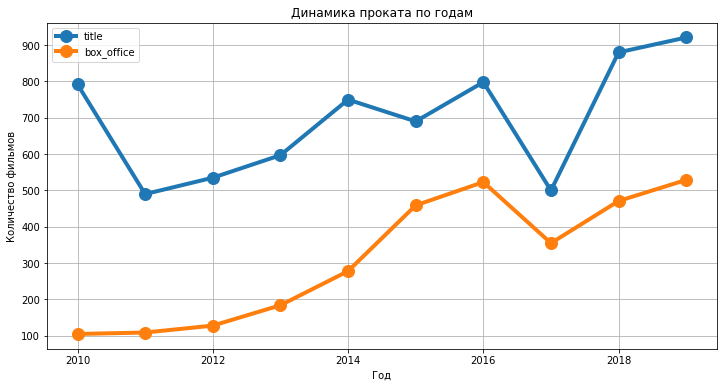

In [79]:
dynamic_by_year = df_filtered.groupby('start_year')[['title', 'box_office']].agg('count')
dynamic_by_year['fraction_info_%'] = dynamic_by_year['box_office'] / dynamic_by_year['title']*100
dynamic_by_year.plot(y=['title', 'box_office'], figsize=(12,6), grid=True, marker='o', linewidth=4, markersize=12)
plt.title('Динамика проката по годам')
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.show()

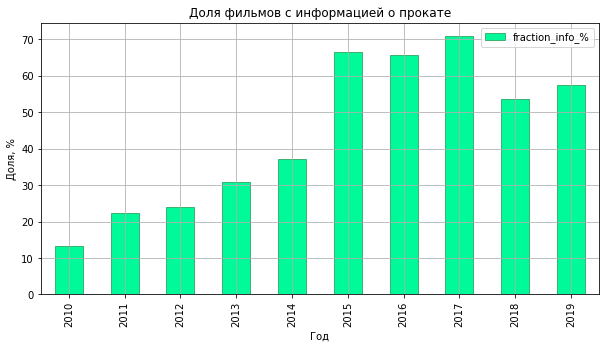

In [80]:
dynamic_by_year.plot(y='fraction_info_%', figsize=(10,5), grid=True, kind='bar', color='mediumspringgreen', edgecolor='mediumseagreen')
plt.title('Доля фильмов с информацией о прокате')
plt.xlabel('Год')
plt.ylabel('Доля, %')
plt.show()

**Вывод:** Наименьшее количество фильмов в прокате было в 2017 г, но в этот же год представленно больше фильмов с информацией о прокате. Наибольшее количество фильмов в прокате в 2019 г.

- Изучим, как менялась динамика проката по годам;
- В каком году сумма сборов была минимальной и максимальной.

dynamic_by_year['box'] = df_filtered.groupby('start_year')['box_office'].agg('sum')
dynamic_by_year

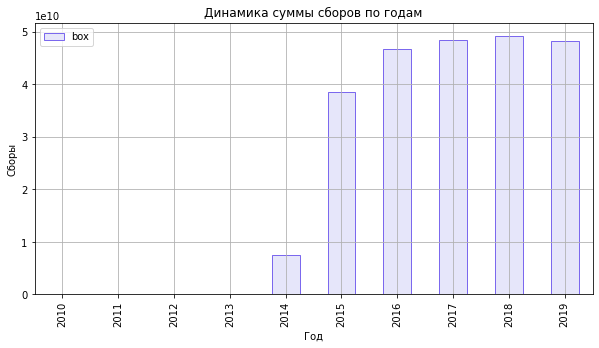

In [82]:
dynamic_by_year.plot(y='box', figsize=(10,5), grid=True, kind='bar', color='lavender', edgecolor='mediumslateblue')
plt.title('Динамика суммы сборов по годам')
plt.xlabel('Год')
plt.ylabel('Сборы')
plt.show()

**Вывод:** В 2010 году минимальное количество сборов. С 2015 г резкое увеличение сборов. Максимальное количество сборов в 2018 г. Причиной увеличения сборов, по предоставленным данным, может быть то, что информация о прокате фильмом в период с 2010 по 2014 не достигает 40% от общего количества фильмов находившихся в прокате.

- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [83]:
stat_box = df_filtered[df_filtered['box_office'].notna()].pivot_table(index='start_year', values='box_office', aggfunc=['mean', 'median'])
stat_box

,mean,median
,box_office,box_office
start_year,,
2010,2.313004e+04,1700.00
2011,1.293832e+05,3000.00
2012,5.433924e+04,5660.00
2013,1.619549e+05,3522.50
2014,2.674359e+07,18137.50
2015,8.393862e+07,4784781.50
2016,8.937345e+07,3776087.56
2017,1.365018e+08,9919415.00


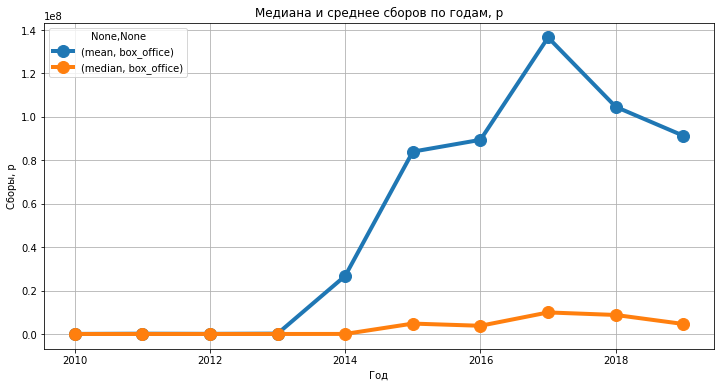

In [84]:
stat_box.plot(figsize=(12,6), grid=True, marker='o', linewidth=4, markersize=12)
plt.title('Медиана и среднее сборов по годам, р')
plt.xlabel('Год')
plt.ylabel('Сборы, р')
plt.show()

**Вывод:** Значительное отличие среднего значения от медианного в период с 2015 по 2019 гг обусловленно выбросами даннных по сборам. В этот период выходили в прокат фильмы с высоким кассовым сбором.

Определим:
- Влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год;
- Фильмы с каким возрастным ограничением собрали больше всего денег в прокате;
- Меняется ли картина в зависимости от года и предположим с чем это может быть связано.

In [85]:
box_age_restriction = df_filtered[df_filtered['start_year'] >= 2015]\
    .pivot_table(index='start_year', values='box_office', columns='age_restriction', aggfunc='median')

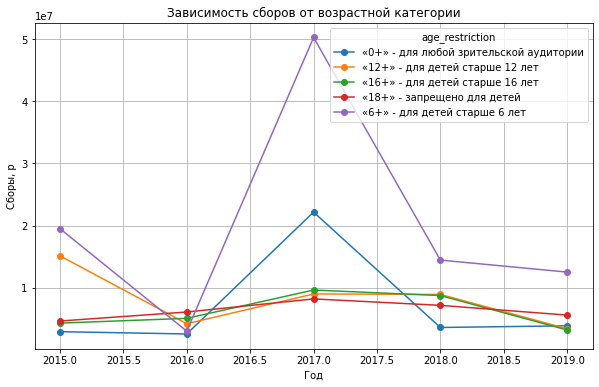

In [86]:
box_age_restriction.plot(figsize=(10,6), grid=True, marker='o')
plt.title('Зависимость сборов от возрастной категории')
plt.xlabel('Год')
plt.ylabel('Сборы, р')
plt.show()

**Вывод:** Возрастные ограничения напрямую влияют на сборы фильмов. Наибольшие сборы наблюдаются в категории 6+ в 2017 г. Предпологаю, что в этот год был выход фильмов-событий в жанре мультфильм

In [87]:
df_filtered[(df_filtered['main_genre'] == 'мультфильм') & (df_filtered['start_year'] == 2017)
            & (df_filtered['box_office'] > 1000000000)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,start_year,main_director,main_genre,"support_fraction, %"
3235,боссмолокосос,124000317,2017-02-09 12:00:00+00:00,Анимационный,дримуоркс анимейшн,сша,том макграт,рэмси энн наито,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.5,"мультфильм,комедия,приключения",1.376727e+09,2017,том макграт,мультфильм,NaN
3742,гадкий я 3,124001617,2017-06-15 12:00:00+00:00,Анимационный,иллюминейшен интертейнмент юниверсал пикчерз,сша,"кайл балда, эрик гуильон, пьер коффан",кристофер меледандри джанет хили бретт хоффман,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.3,"мультфильм,фантастика,фэнтези",1.390393e+09,2017,кайл балда,мультфильм,NaN


<a name="subparagraph8"></a>

### 4.2 Исследование фильмов, которые получили государственную поддержку

Проведем следующие исследования:
- Окупаемость фильмов с господдержкой по жанрам;
- Тип фильма и объем финансирования;
- Источник финансирования и объем финансирования
- Средние рейтинги фильмов с гсподдержкой и без в разрезе жанров

- Проверим окупаемость фильмов с господдержкой по жанрам:

In [88]:
support = df_filtered[df_filtered['budget'].notna()]
support.shape

(315, 20)

In [89]:
support['support_sum'] = support['refundable_support'] + support['nonrefundable_support']
support['payback_support'] = support['box_office'] / support['budget']
support.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,start_year,main_director,main_genre,"support_fraction, %",support_sum,payback_support
1281,пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,ано содействия развитию кинематографии ангелфи...,россия,а.атанесян,аатанесян мбабаханов рбутко,«16+» - для детей старше 16 лет,0.0,...,министерство культуры,8.1,"драма,мелодрама",365353.6,2013,а.атанесян,драма,33.370314,26500000.0,0.004601
1448,бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,ооо компания аткстудио,россия,а.якимчук,атютрюмов,«12+» - для детей старше 12 лет,0.0,...,министерство культуры,NaN,unknown,28140.0,2014,а.якимчук,unknown,70.000000,26000000.0,0.000758
1498,невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,ооо компания реалдакота,россия,"р.давлетьяров, с.комаров",рдавлетьяров акотелевский аолейников,«12+» - для детей старше 12 лет,0.0,...,фонд кино,5.3,"комедия,фантастика",19957031.5,2013,р.давлетьяров,комедия,61.269064,107847945.0,0.113377
1524,берцы,111004314,2014-05-05 12:00:00+00:00,Художественный,ооо студия пассажир,россия,е.миндадзе (псевдоним катя шагалова),лантонова,«16+» - для детей старше 16 лет,0.0,...,министерство культуры,4.2,драма,55917.5,2014,е.миндадзе (псевдоним катя шагалова),драма,69.009473,28000000.0,0.001378
1792,братья ч,111004414,2014-04-23 12:00:00+00:00,Художественный,ооо студия пассажир,россия,м.угаров,аминдадзе лантонова,«16+» - для детей старше 16 лет,0.0,...,министерство культуры,6.4,драма,232100.0,2014,м.угаров,драма,62.476381,25000000.0,0.005800


Средний коэффициент окупаемости по всем жанрам:

In [90]:
support['payback_support'].mean()

0.7633099908958417

Средний рейтинг фильмов:

In [91]:
support['ratings'].mean()

6.015436

In [92]:
support_genre = support.pivot_table(index='main_genre', values=['payback_support', 'ratings', 'budget'], aggfunc='mean')
support_genre['support_sum_genre'] = support.groupby('main_genre')['support_sum'].agg('sum')
support_genre

,budget,payback_support,ratings,support_sum_genre
main_genre,,,,
unknown,6.286410e+07,0.734320,NaN,5.500000e+08
биография,1.763112e+08,1.136724,6.900000,1.125100e+08
боевик,1.206874e+08,0.593031,6.340000,2.540000e+08
военный,1.428785e+08,0.857312,6.466667,4.220009e+08
детектив,2.396445e+08,0.071361,6.760000,4.850000e+08
детский,4.597450e+07,0.021660,7.125000,1.190000e+08
драма,1.201292e+08,0.410662,6.389011,5.239407e+09
история,5.362656e+08,0.561304,5.350000,1.020000e+09
комедия,8.699392e+07,1.527474,5.516177,2.983283e+09


In [93]:
support_genre.corr()

,budget,payback_support,ratings,support_sum_genre
budget,1.000000,0.072843,-0.112347,0.015280
payback_support,0.072843,1.000000,-0.046602,0.101962
ratings,-0.112347,-0.046602,1.000000,-0.156691
support_sum_genre,0.015280,0.101962,-0.156691,1.000000


Очевидная взаимосвязь между данными не наблюдается. Посмотрим на диаграмме рассеяния:

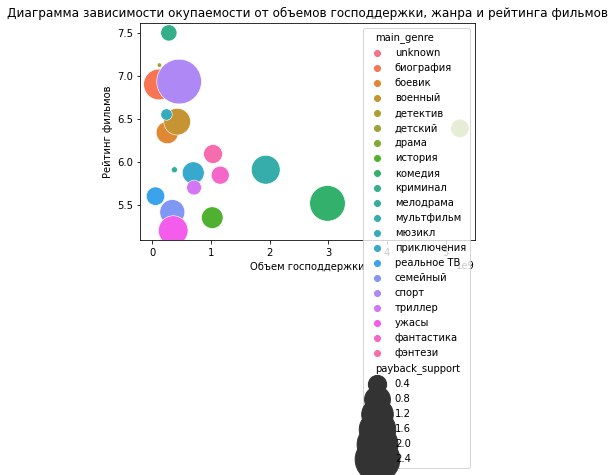

In [94]:
sns.scatterplot(data=support_genre, x='support_sum_genre', y='ratings', size='payback_support', legend=True, hue='main_genre', sizes=(20, 2000))
plt.rcParams['figure.figsize'] = [11, 11]
plt.title('Диаграмма зависимости окупаемости от объемов господдержки, жанра и рейтинга фильмов')
plt.xlabel('Объем господдержки')
plt.ylabel('Рейтинг фильмов')
plt.show()

**Вывод:** Самые окупаемые жанры - спорт и комедия, с коэффициентами окупаемости 2,4 и 1,5 соответственно. При этом, спорт имеет незначительную финансовую господдержку и высокий рейтинг. Наибольшую господдержку имеют комедия и драмма. Драма является наименее интересным жанром, с точки зрения финансирования,  - имеет самую высокую господдержку, невысокий рейтинг, по сборам неокупается даже половина бюджета.

- Проверим по типу фильма и объему финансирования:

In [95]:
support_type = support.pivot_table(index='type', values=['refundable_support', 'nonrefundable_support', 'support_sum'], aggfunc='sum')
support_type

,nonrefundable_support,refundable_support,support_sum
type,,,
Анимационный,1.161520e+09,7.400000e+08,1.901520e+09
Документальный,3.000000e+06,0.000000e+00,3.000000e+06
Художественный,1.398920e+10,2.915000e+09,1.690420e+10


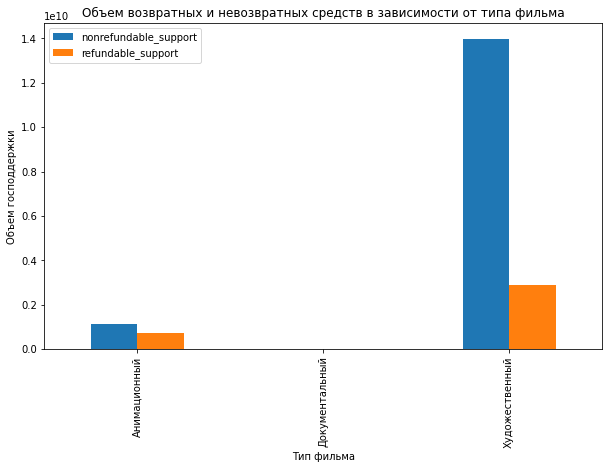

In [96]:
support_type.plot(y=['nonrefundable_support', 'refundable_support'], kind='bar', figsize=(10,6))
plt.title('Объем возвратных и невозвратных средств в зависимости от типа фильма')
plt.xlabel('Тип фильма')
plt.ylabel('Объем господдержки')
plt.show()

- Проверим по источнику финансирования и объему финансирования:

In [97]:
support_type_source = support.pivot_table(index='financing_source', columns='type',\
                                          values=['nonrefundable_support', 'refundable_support'], aggfunc='sum')
support_type_source

nonrefundable_support                 \
type                                      Анимационный Документальный   
financing_source                                                        
министерство культуры                     3.652000e+07      3000000.0   
министерство культуры, фонд кино                   NaN            NaN   
фонд кино                                 1.125000e+09            NaN   

                                                refundable_support  \
type                             Художественный       Анимационный   
financing_source                                                     
министерство культуры              4.791141e+09                0.0   
министерство культуры, фонд кино   8.369314e+08                NaN   
фонд кино                          8.361126e+09        740000000.0   

                                                                
type                             Документальный Художественный  
financing_source                                                
министерство культуры                       0.0   0.000000e+00  
министерство культуры, фонд кино            NaN   3.255000e+08  
фонд кино                                   NaN   2.589500e+09

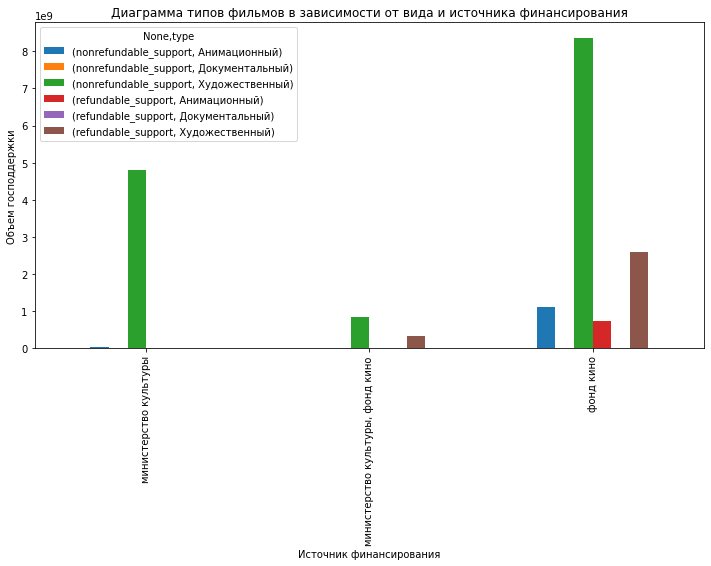

In [98]:
support_type_source.plot(kind='bar', figsize=(12,6))
plt.title('Диаграмма типов фильмов в зависимости от вида и источника финансирования')
plt.xlabel('Источник финансирования')
plt.ylabel('Объем господдержки')
plt.show()

**Вывод:** Художественные фильмы имеют большую финансовую поддержку как от министерства культуру, так и от фонда кино. В основном финансовые средства являются невозвратными. Документальные фильмы имеют минимальную поддержку, финансируются за счет министерства культуры.

- Сравним средние рейтинги фильмов с гсподдержкой и без в разрезе жанров:

In [99]:
comparison_of_ratings = df_filtered[df_filtered['support_fraction, %'].isna()].pivot_table(index = 'main_genre', values='ratings', aggfunc='mean')
comparison_of_ratings['films_support'] = support_genre['ratings']
comparison_of_ratings['ratings_delta'] = comparison_of_ratings['ratings'] - comparison_of_ratings['films_support']

In [100]:
comparison_of_ratings

,ratings,films_support,ratings_delta
main_genre,,,
unknown,5.450000,NaN,NaN
аниме,7.433333,NaN,NaN
биография,7.000000,6.900000,0.100000
боевик,6.462942,6.340000,0.122942
вестерн,7.300000,NaN,NaN
военный,6.794286,6.466667,0.327619
детектив,6.680851,6.760000,-0.079149
детский,6.082609,7.125000,-1.042391
для взрослых,4.650000,NaN,NaN


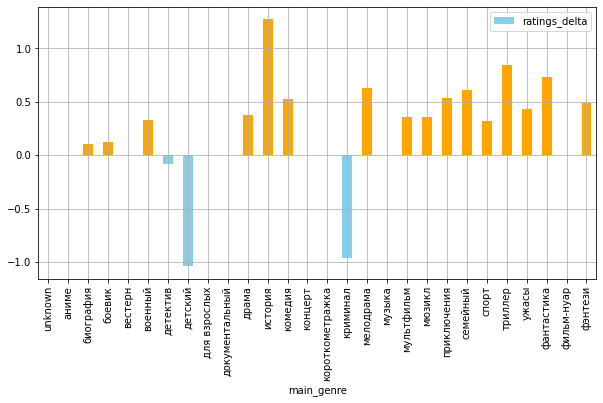

In [101]:
my_color = np.where(comparison_of_ratings['ratings_delta'] >=0, 'orange', 'skyblue')
comparison_of_ratings.plot(y='ratings_delta', figsize=(10,5), grid=True, kind='bar', color=my_color)
plt.show()

**Вывод:** Криминальные и детские фильмы с господдержкой имеют рейтинг выше

<a name="paragraph4"></a>

## Общий вывод

Общее исследование:
1. Прокат:
- Наиболее полно информация о прокате фильмов представленна в период с 2015 по 2019 гг;
- Наибольшее количество фильмов в прокате в 2019г, наименьшее в 2017г;
2. Сборы:
- Наибольший объем сборов наблюдается в 2018 г, наименьший в 2010;
- С 2015 наблюдается резкий скачок в увеличении сборов;
- В период с 2015 по 2109 г наблюдается значительное отличие среднего показателя объемов сборов от медианного;
3. Возрастые ограничения:
- в 2016 году значительный рост сборов на фильмы возрастным ограничением 6+ и 0+;  
Предположительно, основной причиной роста показателей с 2015 года является полнота предоставленных данных. Во вторых, в этот период выходили фильмы способствующие росту объемов сборов.

Исследование фильмов с господдержкой:

4. Окупаемость:
- В целом фильмы с господдержкой не окупаются, за исключением двух жанров: комедия и спорт. Имеют коэффициенты окупаемости 1.5 ти 2.4.
5. Объем финансирования:
- Наибольший объем финансироания приходится на художественное кино и является невозвратными средствами;
6. Источник финансирования:
- Основной источник финансирования  - фонд кино.